In [20]:
%pylab inline
import numpy as np

import seaborn as sns
import glob2
import pandas as pd
import h5py
from scipy.ndimage.filters import gaussian_filter
import natsort


Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_dataframe():
    file_ = '../output/tect_model_data.npz'
    out = np.load(file_)
    d = dict(out)
    df = pd.DataFrame.from_dict(d)
    return df 

In [3]:
df = get_dataframe( )


In [4]:
df

,"(1, 1)","(1, 2)","(2, 3)","(3, 3)",stepAtSave,timeAtSave
0,-0.862069,-0.600000,0.200000,0.862069,0,0.000000e+00
1,-0.862069,-0.599679,0.208782,0.862069,10,3.485518e-07
2,-0.862069,-0.599511,0.206537,0.862069,20,5.317822e-07
3,-0.862069,-0.599371,0.206537,0.862069,30,6.842785e-07


In [5]:
velScale = 3.4482758620689656e-13*(3600*24*365)*100.  #cm/y
timeScale = 8.41e+18/(1e6*3600*24*365)    

In [6]:
df.columns

Index([u'(1, 1)', u'(1, 2)', u'(2, 3)', u'(3, 3)', u'stepAtSave',
       u'timeAtSave'],
      dtype='object')

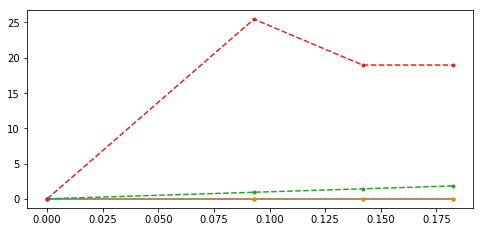

In [15]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(211)


ax.plot(df['timeAtSave']*timeScale, df['(1, 1)']*2900 - df['(1, 1)'][0]*2900, 
        marker='.',label  = '', ls = '-')


ax.plot(df['timeAtSave']*timeScale, df['(3, 3)']*2900 - df['(3, 3)'][0]*2900, 
        marker='.',label  = '', ls = '--')

ax.plot(df['timeAtSave']*timeScale, df['(1, 2)']*2900 - df['(1, 2)'][0]*2900, 
marker='.',label  = '', ls = '--')

ax.plot(df['timeAtSave']*timeScale, df['(2, 3)']*2900 - df['(2, 3)'][0]*2900, 
        marker='.',label  = '', ls = '--')

## Surface vels

In [16]:
def listify_data(unique_string, path):
    glob_str = path + '*' + unique_string + '*'
    files = natsort.natsort(glob2.glob(glob_str))
    #print(glob_str)
    #return files
    
    dataList = []
    for f in files:
        with h5py.File(f,'r') as hf:
            data = hf.get('data')
            dataList.append(np.array(data))
    return dataList

In [19]:
vx = listify_data('surfVx', '../output/files/')

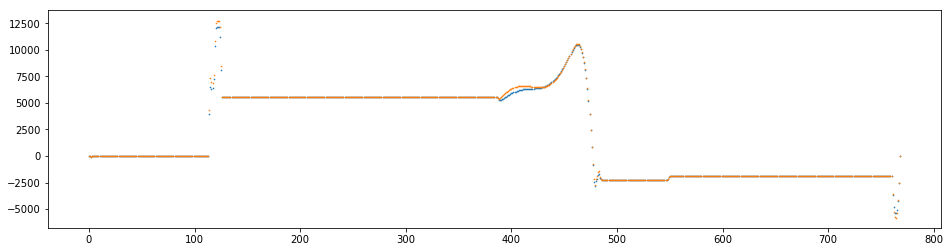

In [34]:
fig, ax = plt.subplots(figsize=(16,4))
for v in vx[-2:]:
    ax.scatter(np.arange(len(v)), v, s=0.4)

In [25]:
v

array([[  3.67806122e-13],
       [  9.93374221e+00],
       [  8.31274018e-01],
       [  2.51415076e-12],
       [  2.32528455e-12],
       [  2.34220462e-12],
       [  2.33887904e-12],
       [  2.34143864e-12],
       [  2.34069669e-12],
       [  2.34555991e-12],
       [  2.34663750e-12],
       [  2.35057160e-12],
       [  2.35221169e-12],
       [  2.35897071e-12],
       [  2.36320683e-12],
       [  2.37080219e-12],
       [  2.37702726e-12],
       [  2.38753503e-12],
       [  2.39863183e-12],
       [  2.41618586e-12],
       [  2.43059414e-12],
       [  2.44896991e-12],
       [  2.46539624e-12],
       [  2.48686637e-12],
       [  2.50697325e-12],
       [  2.53779076e-12],
       [  2.56683564e-12],
       [  2.59667728e-12],
       [  2.62509336e-12],
       [  2.65535209e-12],
       [  2.68473808e-12],
       [  2.71174503e-12],
       [  2.73049972e-12],
       [  2.73994389e-12],
       [  2.74156092e-12],
       [  2.73889932e-12],
       [  2.73055484e-12],
 